In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import datetime
import seaborn as sns
#matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error


Bad key "text.kerning_factor" on line 4 in
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import seaborn as sns
sns.set(color_codes= True)
np.random.seed(sum(map(ord,'distributions')))

In [3]:
def change_date(s):
    s = datetime.datetime.strptime(s, "%Y-%m")  # 把日期标准化，转化结果如：2015/1/4 => 2015-01-04 00:00:00
    s = str(s)  # 上一步把date转化为了时间格式，因此要把date转回str格式
    return s[:7] # 只获取年月日，即“位置7”之前的字符串

In [4]:
#含水量日期排序
df1 = pd.read_csv('data/fj3.csv')
df1['日期'] = df1['年份'].map(str)+"-"+df1['月份'].map(str)
df1['日期'] = df1['日期'].map(change_date)
df1 = df1.sort_values(by='日期') 
df1.head(5)

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),日期
111,1,2012,115.375,44.125,13.73,30.87,42.79,168.56,2012-01
112,2,2012,115.375,44.125,13.00,30.87,42.79,168.56,2012-02
113,3,2012,115.375,44.125,12.60,30.87,42.79,168.56,2012-03
114,4,2012,115.375,44.125,11.97,30.73,42.76,168.56,2012-04
115,5,2012,115.375,44.125,14.18,29.99,42.58,168.56,2012-05


In [5]:
df3 = pd.read_csv('data/fj4.csv')
df3['日期'] = df3['年份'].map(str)+"-"+df3['月份'].map(str)
df3['日期'] = df3['日期'].map(change_date)
df3 = df3.sort_values(by='日期')
df3.head(5)

,月份,年份,经度(lon),纬度(lat),土壤蒸发量(W/m2),土壤蒸发量(mm),Unnamed: 6,Unnamed: 7,日期
111,1,2012,115.375,44.125,0.57,0.61,NaN,NaN,2012-01
112,2,2012,115.375,44.125,0.86,0.86,NaN,NaN,2012-02
113,3,2012,115.375,44.125,1.78,1.91,NaN,NaN,2012-03
114,4,2012,115.375,44.125,6.94,7.20,NaN,NaN,2012-04
115,5,2012,115.375,44.125,16.89,18.10,NaN,NaN,2012-05


In [6]:
df4 = pd.read_csv('data/fj6.csv')
df4['日期'] = df4['年份'].map(str)+"-"+df4['月份'].map(str)
df4['日期'] = df4['日期'].map(change_date)
df4 = df4.sort_values(by='日期')
df4.head(5)

,月份,年份,经度(lon),纬度(lat),植被指数(NDVI),Unnamed: 5,Unnamed: 6,日期
112,1,2012,115.375,44.125,0.002,NaN,NaN,2012-01
113,2,2012,115.375,44.125,0.002,NaN,NaN,2012-02
114,3,2012,115.375,44.125,0.120,NaN,NaN,2012-03
115,4,2012,115.375,44.125,0.168,NaN,NaN,2012-04
116,5,2012,115.375,44.125,0.195,NaN,NaN,2012-05


In [7]:
df5 = pd.read_csv('data/fj9.csv')
df5['日期'] = df5['年份'].map(str)+"-"+df5['月份'].map(str)
df5['日期'] = df5['日期'].map(change_date)
df5 = df5.sort_values(by='日期')
df5.head(5)

,月份,年份,经度(lon),纬度(lat),径流量(m3/s),径流量(m3),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,日期
111,1,2012,115.375,44.125,0.000000,0.0,NaN,NaN,NaN,NaN,2012-01
112,2,2012,115.375,44.125,0.000000,0.0,NaN,NaN,NaN,NaN,2012-02
113,3,2012,115.375,44.125,1.010081,2705400.0,NaN,NaN,NaN,NaN,2012-03
114,4,2012,115.375,44.125,0.569792,1476900.0,NaN,NaN,NaN,NaN,2012-04
115,5,2012,115.375,44.125,0.168347,450900.0,NaN,NaN,NaN,NaN,2012-05


In [8]:
df6 = pd.read_csv('data/fj10.csv')
df6 = df6.sort_values(by='日期')
df6.head(5)

,日期,经度(lon),纬度(lat),"高层植被(LAIH,m2/m2)","低层植被(LAIL,m2/m2)",Unnamed: 5
115,201201,115.375,44.125,0.0,0.636,NaN
116,201202,115.375,44.125,0.0,0.652,NaN
117,201203,115.375,44.125,0.0,0.717,NaN
118,201204,115.375,44.125,0.0,0.727,NaN
119,201205,115.375,44.125,0.0,0.739,NaN


In [9]:
df = df1.drop(['月份', '年份','经度(lon)', '纬度(lat)'], axis = 1)
df.head(5)

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),日期
111,13.73,30.87,42.79,168.56,2012-01
112,13.00,30.87,42.79,168.56,2012-02
113,12.60,30.87,42.79,168.56,2012-03
114,11.97,30.73,42.76,168.56,2012-04
115,14.18,29.99,42.58,168.56,2012-05


In [10]:
df7 = pd.read_csv('data/降水量.csv')
df7.head(5)

,降水量(mm)
0,2.29
1,2.29
2,21.84
3,6.10
4,50.80


In [11]:
#组合表格，便于数据读取
df0 = df.join(df3['土壤蒸发量(W/m2)'])
df0 = df0.join(df4['植被指数(NDVI)'])
df0 = df0.join(df5['径流量(m3/s)'])
df0 = df0.join(df6['低层植被(LAIL,m2/m2)'])
df0 = df0.join(df7['降水量(mm)'])
df0 = df0[['日期', '降水量(mm)','土壤蒸发量(W/m2)', '植被指数(NDVI)', '径流量(m3/s)', '低层植被(LAIL,m2/m2)','10cm湿度(kg/m2)','40cm湿度(kg/m2)','100cm湿度(kg/m2)','200cm湿度(kg/m2)']]
df0.head(5)

,日期,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
111,2012-01,10.67,0.57,0.211,0.000000,0.847,13.73,30.87,42.79,168.56
112,2012-02,17.78,0.86,0.002,0.000000,0.738,13.00,30.87,42.79,168.56
113,2012-03,52.07,1.78,0.002,1.010081,0.710,12.60,30.87,42.79,168.56
114,2012-04,134.37,6.94,0.120,0.569792,0.648,11.97,30.73,42.76,168.56
115,2012-05,37.34,16.89,0.168,0.168347,0.636,14.18,29.99,42.58,168.56


In [22]:
df0

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
111,10.67,0.57,0.211,0.000000,0.84700,13.73,30.87,42.79,168.56
112,17.78,0.86,0.002,0.000000,0.73800,13.00,30.87,42.79,168.56
113,52.07,1.78,0.002,1.010081,0.71000,12.60,30.87,42.79,168.56
114,134.37,6.94,0.120,0.569792,0.64800,11.97,30.73,42.76,168.56
115,37.34,16.89,0.168,0.168347,0.63600,14.18,29.99,42.58,168.56
...,...,...,...,...,...,...,...,...,...
13,2.79,1.39,0.325,0.295573,0.96400,13.91,52.17,93.43,164.49
14,9.14,0.87,0.239,0.217238,0.98300,13.14,52.14,93.45,164.48
0,2.29,0.41,0.010,0.160786,0.63638,12.45,52.14,93.45,164.48
1,2.29,0.28,0.010,0.116071,0.65073,12.10,52.14,93.45,164.48


In [12]:
# df0.to_csv('data/result0.csv',encoding="utf_8_sig")

In [13]:
df0.describe

<bound method NDFrame.describe of           日期  降水量(mm)  土壤蒸发量(W/m2)  植被指数(NDVI)  径流量(m3/s)  低层植被(LAIL,m2/m2)  \
111  2012-01    10.67         0.57       0.211   0.000000           0.84700   
112  2012-02    17.78         0.86       0.002   0.000000           0.73800   
113  2012-03    52.07         1.78       0.002   1.010081           0.71000   
114  2012-04   134.37         6.94       0.120   0.569792           0.64800   
115  2012-05    37.34        16.89       0.168   0.168347           0.63600   
..       ...      ...          ...         ...        ...               ...   
13   2021-11     2.79         1.39       0.325   0.295573           0.96400   
14   2021-12     9.14         0.87       0.239   0.217238           0.98300   
0    2022-01     2.29         0.41       0.010   0.160786           0.63638   
1    2022-02     2.29         0.28       0.010   0.116071           0.65073   
2    2022-03    21.84         5.58       0.187   0.825605           0.71679   

     10cm湿度(kg/m2

In [14]:
# 对缺失值进行填充
df0.fillna(-1, inplace=True)
df0.fillna(-1, inplace=True)

df0.isnull().sum()

日期                  0
降水量(mm)             0
土壤蒸发量(W/m2)         0
植被指数(NDVI)          0
径流量(m3/s)           0
低层植被(LAIL,m2/m2)    0
10cm湿度(kg/m2)       0
40cm湿度(kg/m2)       0
100cm湿度(kg/m2)      0
200cm湿度(kg/m2)      0
dtype: int64

In [15]:
#归一化
def minmax_norm(df_input):
    return (df0 - df0.min()) / ( df0.max() - df0.min())
dmax=df0.max()
dmin=df0.min()
dmax['10cm湿度(kg/m2)']

22.1

In [16]:
f = df0['日期']
df0 = df0.drop(['日期'],axis = 1)
df0.head(5)

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
111,10.67,0.57,0.211,0.000000,0.847,13.73,30.87,42.79,168.56
112,17.78,0.86,0.002,0.000000,0.738,13.00,30.87,42.79,168.56
113,52.07,1.78,0.002,1.010081,0.710,12.60,30.87,42.79,168.56
114,134.37,6.94,0.120,0.569792,0.648,11.97,30.73,42.76,168.56
115,37.34,16.89,0.168,0.168347,0.636,14.18,29.99,42.58,168.56


In [17]:
df0 = df0.astype(float)
#df0_minmax_norm = minmax_norm(df0)
df0.head(5)

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
111,10.67,0.57,0.211,0.000000,0.847,13.73,30.87,42.79,168.56
112,17.78,0.86,0.002,0.000000,0.738,13.00,30.87,42.79,168.56
113,52.07,1.78,0.002,1.010081,0.710,12.60,30.87,42.79,168.56
114,134.37,6.94,0.120,0.569792,0.648,11.97,30.73,42.76,168.56
115,37.34,16.89,0.168,0.168347,0.636,14.18,29.99,42.58,168.56


In [18]:
df0.describe()

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,80.827886,9.340244,0.239829,0.284275,0.765780,14.567724,42.383089,55.351057,167.218618
std,143.074081,9.214743,0.146667,0.218922,0.112521,2.849445,7.476833,14.536285,0.976774
min,0.000000,0.280000,-0.017000,0.000000,0.636000,9.640000,29.710000,42.360000,164.480000
25%,6.985000,1.170000,0.176000,0.153352,0.681000,12.460000,35.225000,44.695000,166.785000
50%,30.730000,6.430000,0.207000,0.217238,0.727000,14.240000,42.710000,48.390000,167.370000
75%,72.390000,14.820000,0.325000,0.356855,0.827000,16.645000,46.760000,60.860000,167.855000
max,891.790000,37.170000,0.605000,1.046371,0.983000,22.100000,61.700000,93.450000,168.560000


In [19]:
df0_minmax_norm = minmax_norm(df0)
df0_minmax_norm.head(5)

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
111,0.011965,0.007861,0.366559,0.000000,0.608069,0.328250,0.036261,0.008417,1.0
112,0.019937,0.015722,0.030547,0.000000,0.293948,0.269663,0.036261,0.008417,1.0
113,0.058388,0.040661,0.030547,0.965318,0.213256,0.237560,0.036261,0.008417,1.0
114,0.150674,0.180537,0.220257,0.544541,0.034582,0.186998,0.031885,0.007829,1.0
115,0.041871,0.450258,0.297428,0.160886,0.000000,0.364366,0.008753,0.004306,1.0


In [20]:
df0_minmax_norm = df0_minmax_norm.join(df['日期'])
df0_minmax_norm.head(5)

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)",10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),日期
111,0.011965,0.007861,0.366559,0.000000,0.608069,0.328250,0.036261,0.008417,1.0,2012-01
112,0.019937,0.015722,0.030547,0.000000,0.293948,0.269663,0.036261,0.008417,1.0,2012-02
113,0.058388,0.040661,0.030547,0.965318,0.213256,0.237560,0.036261,0.008417,1.0,2012-03
114,0.150674,0.180537,0.220257,0.544541,0.034582,0.186998,0.031885,0.007829,1.0,2012-04
115,0.041871,0.450258,0.297428,0.160886,0.000000,0.364366,0.008753,0.004306,1.0,2012-05


In [21]:
X

NameError: name 'X' is not defined

In [ ]:
y

111    0.328250
112    0.269663
113    0.237560
114    0.186998
115    0.364366
         ...   
13     0.342697
14     0.280899
0      0.225522
1      0.197432
2      0.426966
Name: 10cm湿度(kg/m2), Length: 123, dtype: float64

In [ ]:
X = df0_minmax_norm.drop(['日期','10cm湿度(kg/m2)','40cm湿度(kg/m2)','100cm湿度(kg/m2)','200cm湿度(kg/m2)'], axis = 1)
y = df0_minmax_norm['10cm湿度(kg/m2)']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.83, random_state = 0)

In [ ]:
len(X)*0.8

98.4

In [ ]:
slice = int(len(X) * 0.9)
slice

110

In [ ]:
X_train = X[:slice]
X_test = X[slice:]
y_train = y[:slice]
y_test = y[slice:]

In [ ]:
X = df0_minmax_norm.drop(['日期','10cm湿度(kg/m2)','40cm湿度(kg/m2)','100cm湿度(kg/m2)','200cm湿度(kg/m2)'], axis = 1)
y = df0_minmax_norm['10cm湿度(kg/m2)']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.83, random_state = 0)

In [ ]:

# using all features 10个特征 不同深度 不同树数的训练集测试集误差
#深度范围6-10
y_1 = []
for i in range(5):
    bagged_boston = RandomForestRegressor(max_depth = 6+i,
                                          n_estimators = 100,max_features = 3, random_state = 1)
    bagged_boston.fit(X_train, y_train)
    
    print('\n最大深度：',i+6)
    #计算误差
    pred = bagged_boston.predict(X_train)
    print('训练集MSE:')
    print(mean_squared_error(y_train, pred))
    
    pred = bagged_boston.predict(X_test)
    print('测试集MSE:')
    print(mean_squared_error(y_test, pred))

    print("*****************************")

#树数范围10-100 以10为间隔
x_1 = np.arange(10,501,10)
y_1 = []
for i in range(len(x_1)):
    bagged_boston = RandomForestRegressor(max_depth = 10,
                                          n_estimators = x_1[i],max_features = 3, random_state = 1)
    bagged_boston.fit(X_train, y_train)
    
    print('\n树数：',x_1[i])
    #计算误差
    pred = bagged_boston.predict(X_train)
    print('训练集MSE:')
    print(mean_squared_error(y_train, pred))
    
    pred = bagged_boston.predict(X_test)
    res = mean_squared_error(y_test, pred)
    y_1.append(res)
    print('测试集MSE:')
    print(res)
    print(pred)
    print("============================")


最大深度： 6
训练集MSE:
0.0026093096071128615
测试集MSE:
0.015520702611744864
*****************************

最大深度： 7
训练集MSE:
0.0020858322187136337
测试集MSE:
0.016539140825169347
*****************************

最大深度： 8
训练集MSE:
0.0017111148342157222
测试集MSE:
0.016403707159998383
*****************************

最大深度： 9
训练集MSE:
0.001642917593593774
测试集MSE:
0.015856957598416148
*****************************

最大深度： 10
训练集MSE:
0.0016577682576474923
测试集MSE:
0.016258704381478105
*****************************

树数： 10
训练集MSE:
0.0024726470018858276
测试集MSE:
0.0171671673767719
[0.19133226 0.21701445 0.24743178 0.26982343 0.72800963 0.47319422
 0.33113965 0.66677368 0.20920947 0.65794543 0.71797753 0.29060995
 0.4276886  0.43360086 0.22568218 0.6111557  0.60529695 0.26252006
 0.22170947 0.59847512 0.61958266]

树数： 20
训练集MSE:
0.002038146960969116
测试集MSE:
0.01733109701896909
[0.18944623 0.19983949 0.31622908 0.24604735 0.72684591 0.51151685
 0.35479248 0.70814607 0.2341874  0.65854735 0.72644462 0.30152488
 0.3930577

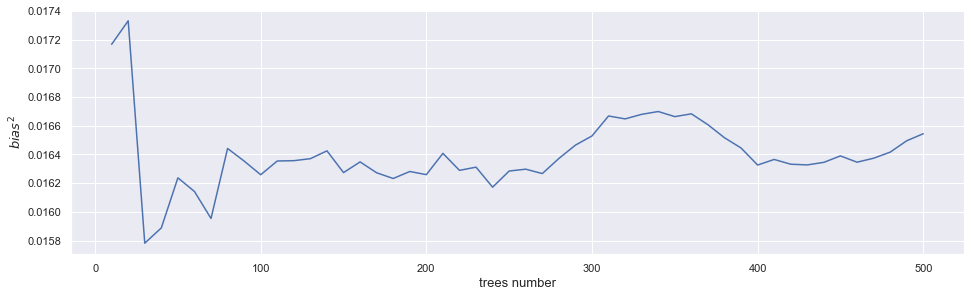

In [ ]:
fig = plt.figure(figsize=(16,4.5))
plt.plot(x_1, y_1)
plt.ylabel('${bias^2}$',fontsize=13)
plt.xlabel('trees number',fontsize=13)
plt.show()

In [ ]:
import random
max_features = 3
random_arr = random.sample(range(0,3), max_features)
X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
x_1 = np.arange(20,101,20)
print('\n最大属性数：',max_features)
for i in range(len(x_1)):

    bagged_boston = RandomForestRegressor(max_depth = 10,
                                          n_estimators = x_1[i],max_features = max_features, random_state = 1)
    bagged_boston.fit(X_train_arr[:,random_arr], y_train)
    #print('\n树数：',x_1[i])
    #计算误差
    pred = bagged_boston.predict(X_train_arr[:,random_arr])
    #print('训练集MSE:')
    #print(mean_squared_error(y_train, pred))
    
    pred = bagged_boston.predict(X_test_arr[:,random_arr])
    #print('测试集MSE:')
    print(mean_squared_error(y_test, pred))


最大属性数： 3
0.01736675206801874
0.01677561045960117
0.016316676531885316
0.01634152594923361
0.016975636002278964


In [ ]:
#5通过随机森林，描述不同树数的bias^2曲线 tree 10-500 间隔10
x_2 = np.arange(10,501,10)
y_2 = []
for i in range(len(x_2)):
    boosted_boston = RandomForestRegressor(n_estimators = x_2[i], 
                                       max_depth = 6, 
                                       max_features = max_features,
                                       random_state = 1)
    boosted_boston.fit(X_train, y_train)
    res= mean_squared_error(y_test, boosted_boston.predict(X_test))
    y_2.append(res)

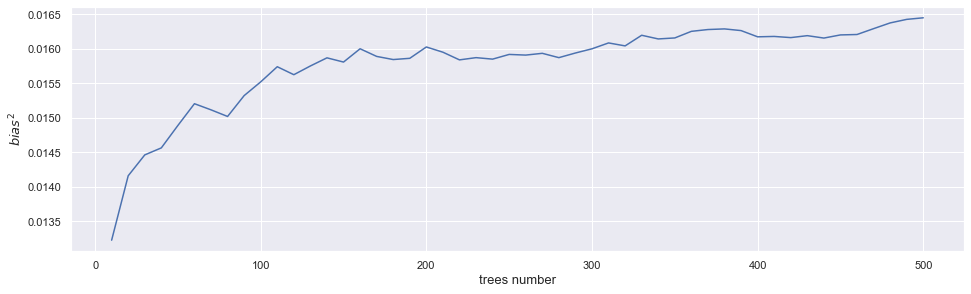

In [ ]:
fig = plt.figure(figsize=(16,4.5))
plt.plot(x_2, y_2)
plt.ylabel('${bias^2}$',fontsize=13)
plt.xlabel('trees number',fontsize=13)
plt.show()

In [ ]:
x_3 = np.arange(10,501,10)
y_3 = []
for i in range(len(x_3)):
    boosted_boston1 = GradientBoostingRegressor(n_estimators = x_3[i], 
                                       learning_rate = 0.01, 
                                       max_depth = 6, 
                                       max_features = max_features,
                                       random_state = 1)
    boosted_boston1.fit(X_train, y_train)
    res1= mean_squared_error(y_test, boosted_boston1.predict(X_test))
    y_3.append(res1)

In [ ]:
sum(y_3)/len(y_3)

0.021965933331983503

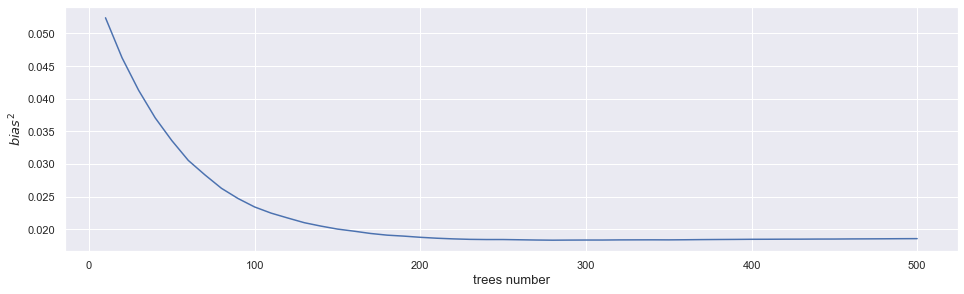

In [ ]:
fig = plt.figure(figsize=(16,4.5))
plt.plot(x_3, y_3)
plt.ylabel('${bias^2}$',fontsize=13)
plt.xlabel('trees number',fontsize=13)
plt.show()

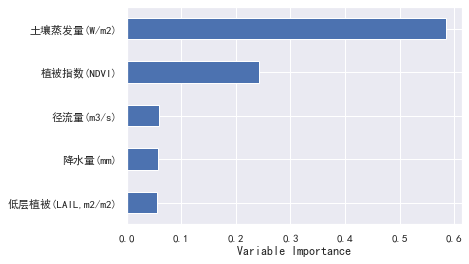

In [ ]:
#提升的随机森林GBRT\GBDT
feature_importance1 = boosted_boston1.feature_importances_

rel_imp = pd.Series(feature_importance1, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'b', )
plt.rcParams['font.sans-serif']=['SimHei']
plt.xlabel('Variable Importance')

plt.gca().legend_ = None

In [ ]:
rel_imp.value_counts()

0.055249    1
0.058211    1
0.059306    1
0.242821    1
0.584414    1
dtype: int64

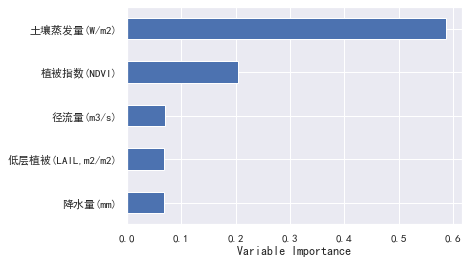

In [ ]:
#随机森林
feature_importance = boosted_boston.feature_importances_

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'b', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

In [ ]:
rel_imp.value_counts()

0.068291    1
0.069346    1
0.070952    1
0.205309    1
0.586102    1
dtype: int64

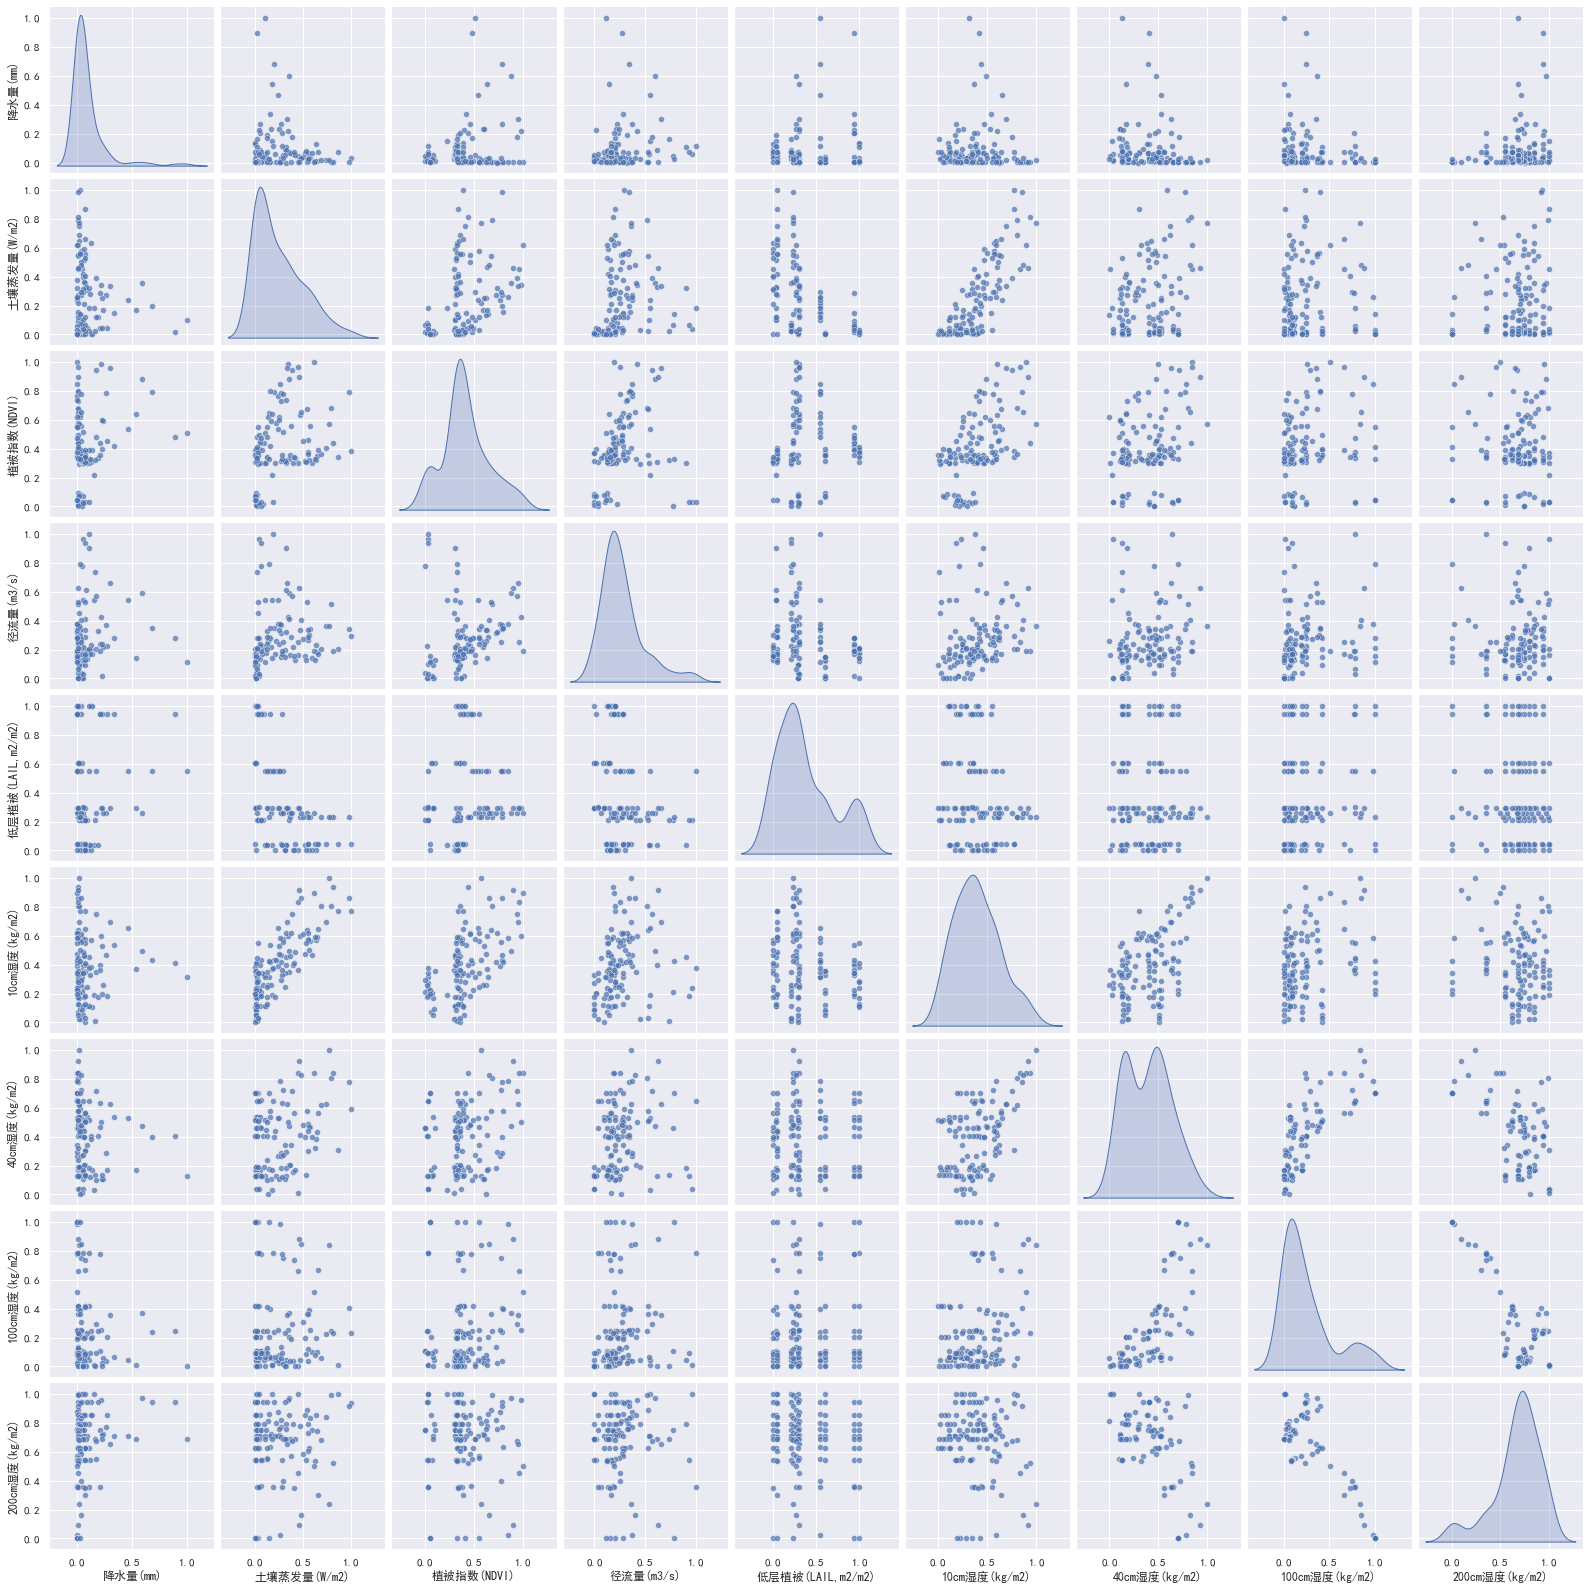

In [ ]:
sns.pairplot(df0_minmax_norm, diag_kind = 'kde', plot_kws=dict(alpha = 0.7))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
plt.show()

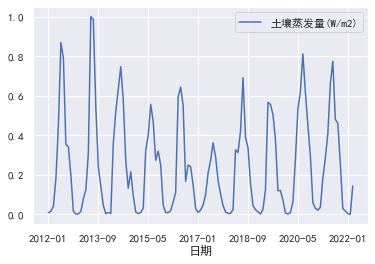

In [ ]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
df0_minmax_norm.plot(x='日期',y='土壤蒸发量(W/m2)')

In [ ]:
pred = boosted_boston1.predict(X_test)
pred

array([0.10445311, 0.23615833, 0.31802716, 0.25790809, 0.71639712,
       0.53970299, 0.37735914, 0.71973827, 0.22256128, 0.6158642 ,
       0.73005905, 0.3508191 , 0.3320752 , 0.40266731, 0.1917456 ,
       0.63986536, 0.55913557, 0.26464449, 0.14730642, 0.63214709,
       0.62985829])

In [ ]:
#逆归一化
def reminmax_norm(df_input):
    return df_input*( dmax['10cm湿度(kg/m2)'] - dmin['10cm湿度(kg/m2)'] )+dmin['10cm湿度(kg/m2)'] 

In [ ]:
pred1=reminmax_norm(pred)
print(pred1)

[10.94148574 12.58253277 13.60261845 12.85353485 18.56630817 16.36469929
 14.34189485 18.6079389  12.41311354 17.31366787 18.7365358  14.01120602
 13.77765699 14.6572347  12.02915023 17.61272243 16.60682922 12.9374703
 11.47543797 17.51655274 17.48803424]


In [ ]:
import lightgbm as lgb
import xgboost as xgb

In [ ]:
X_train

,mm,Wm2,NDVI,m3s,LAILm2m2
19,0.076330,0.531580,0.310289,0.126204,0.000000
51,0.006840,0.009217,0.353698,0.145954,0.608069
103,0.093419,0.307400,0.321543,0.199422,0.000000
16,0.012537,0.009488,0.012862,0.000000,0.293948
8,0.070353,0.660884,0.392283,0.166249,0.043228
...,...,...,...,...,...
58,0.049844,0.291949,0.512862,0.165222,0.262248
55,0.060956,0.208729,0.303859,0.167630,0.000000
12,0.003700,0.257522,0.847267,0.375241,0.550432
86,0.003129,0.008674,0.353698,0.175578,1.000000


In [ ]:
y_train

19     0.551364
51     0.227929
103    0.247994
16     0.178170
8      0.643660
         ...   
58     0.577047
55     0.174157
12     0.585072
86     0.408507
83     0.615570
Name: 10cm湿度(kg/m2), Length: 102, dtype: float64

In [ ]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test  = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
X_train

,mm,Wm2,NDVI,m3s,LAILm2m2
19,0.076330,0.531580,0.310289,0.126204,0.000000
51,0.006840,0.009217,0.353698,0.145954,0.608069
103,0.093419,0.307400,0.321543,0.199422,0.000000
16,0.012537,0.009488,0.012862,0.000000,0.293948
8,0.070353,0.660884,0.392283,0.166249,0.043228
...,...,...,...,...,...
58,0.049844,0.291949,0.512862,0.165222,0.262248
55,0.060956,0.208729,0.303859,0.167630,0.000000
12,0.003700,0.257522,0.847267,0.375241,0.550432
86,0.003129,0.008674,0.353698,0.175578,1.000000


In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)

In [ ]:
param = {
    "seed":1111,
    "objective": "regression_l1",
    "learning_rate" : 0.1,
    'num_leaves': 8,
    "max_bin":4,
    'bagging_fraction': 0.7,
    'feature_fraction': 0.6,
    "metric": "mae",
    "boosting": "gbdt",
    "verbose":-1}

In [ ]:
model = lgb.cv(param, train_set=lgb_train, nfold=10, stratified=False, 
               num_boost_round=1, verbose_eval = 10,early_stopping_rounds=30,
               return_cvbooster=True,)
booster = model['cvbooster']

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
test_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
X_test

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)"
28,0.070061,0.001355,0.353698,0.094928,0.293948
17,0.073481,0.062890,0.030547,0.936416,0.213256
121,0.892632,0.016265,0.480707,0.277248,0.945245
62,0.009397,0.011114,0.366559,0.000000,1.000000
119,0.217316,0.341556,0.987138,0.424334,0.296830
84,0.000572,0.249661,0.620579,0.333092,0.550432
109,0.269155,0.045541,0.454984,0.226228,0.945245
118,0.595275,0.353483,0.879421,0.593931,0.262248
52,0.018794,0.021415,0.081994,0.094928,0.293948
34,0.001144,0.379236,0.556270,0.287091,0.262248


In [ ]:
# 模型预测以及输出文件
test_pred = np.zeros(X_test.shape[0])

for model in booster.boosters:
    test_pred += model.predict(X_test) / 10
test_pred
# X_test['房屋租金'] = test_pred
# df_test[['ID', '房屋租金']].to_csv('sublgb_16f_31_2000.csv', index=False, encoding='utf-8')

array([0.35603933, 0.34335072, 0.35720305, 0.35523274, 0.38411717,
       0.35800963, 0.35720305, 0.38411717, 0.34335072, 0.38411717,
       0.38411717, 0.34335072, 0.35800963, 0.38411717, 0.34335072,
       0.38411717, 0.38411717, 0.34335072, 0.34335072, 0.38411717,
       0.38411717])

In [ ]:
test_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

# xgboost

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
def cv_model(clf, train_x, train_y, test_x, clf_name):
    folds = 12
    seed = 2022
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    test = np.zeros(test_x.shape[0])
    train = np.zeros(train_x.shape[0])
    cv_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y.iloc[train_index], train_x.iloc[valid_index], train_y.iloc[valid_index]
        if clf_name == "xgb":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            test_matrix = clf.DMatrix(test_x)

            params = { 
                        "max_depth":8,
                        'objective':'reg:linear',
                        'eval_metric': 'mae',
                        'n_jobs':-1,
                        'learning_rate':0.1,
                      }
            params['gpu_id'] = 0
            params['tree_method'] = 'gpu_hist'
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            model = clf.train(params, train_matrix, num_boost_round=8000, evals=watchlist, verbose_eval=100, early_stopping_rounds=100)
            val_pred  = model.predict(valid_matrix)
            test_pred = model.predict(test_matrix)
            test += test_pred
        
    test = test / kf.n_splits

    return test

In [ ]:
def xgb_model(x_train, y_train, test_x):
    xgb_test = cv_model(xgb, x_train, y_train, test_x,"xgb")
    return xgb_test

xgb_test = xgb_model(X_train, y_train,X_test)

************************************ 1 ************************************
[21:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:0.19539	eval-mae:0.17862
[100]	train-mae:0.00049	eval-mae:0.11300
[200]	train-mae:0.00050	eval-mae:0.11298
[267]	train-mae:0.00050	eval-mae:0.11298
************************************ 2 ************************************
[21:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:0.19052	eval-mae:0.24475
[100]	train-mae:0.00054	eval-mae:0.13899
[200]	train-mae:0.00052	eval-mae:0.13896
[205]	train-mae:0.00052	eval-mae:0.13896
************************************ 3 ************************************
[21:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective

In [ ]:
xgb_test

array([0.10626534, 0.24387035, 0.31194242, 0.25577673, 0.68137059,
       0.49743555, 0.40438704, 0.69368492, 0.15382823, 0.6649815 ,
       0.71155422, 0.35374671, 0.41141628, 0.43143373, 0.24403242,
       0.70755757, 0.56158141, 0.21489035, 0.19361346, 0.74626334,
       0.68839361])

In [ ]:
pred3=reminmax_norm(xgb_test)
pred3

array([10.96406618, 12.67862458, 13.5268025 , 12.8269781 , 18.12987757,
       15.83804692, 14.67866254, 18.28331411, 11.55669974, 17.92566954,
       18.50596563, 14.04768407, 14.76624688, 15.01566434, 12.68064391,
       18.45616731, 16.63730434, 12.31753373, 12.05242371, 18.93844116,
       18.21738435])

In [ ]:
y_test

28     0.000000
17     0.185393
121    0.413323
62     0.126003
119    0.600321
84     0.474318
109    0.182986
118    0.491172
52     0.166132
34     0.621990
9      1.000000
5      0.379615
96     0.428571
57     0.456661
113    0.237560
33     0.610754
32     0.570626
87     0.073034
2      0.426966
93     0.566613
45     0.804173
Name: 10cm湿度(kg/m2), dtype: float64

In [ ]:
# for i in range(len(x_3)):
#     boosted_boston1 = GradientBoostingRegressor(n_estimators = x_3[i], 
#                                        learning_rate = 0.01, 
#                                        max_depth = 6, 
#                                        max_features = max_features,
#                                        random_state = 1)
#     boosted_boston1.fit(X_train, y_train)
res1 = mean_squared_error(y_test, xgb_test)
    # y_3.append(res1)

In [ ]:
res1

0.01692931746666205

In [ ]:
X_train

,降水量(mm),土壤蒸发量(W/m2),植被指数(NDVI),径流量(m3/s),"低层植被(LAIL,m2/m2)"
19,0.076330,0.531580,0.310289,0.126204,0.000000
51,0.006840,0.009217,0.353698,0.145954,0.608069
103,0.093419,0.307400,0.321543,0.199422,0.000000
16,0.012537,0.009488,0.012862,0.000000,0.293948
8,0.070353,0.660884,0.392283,0.166249,0.043228
...,...,...,...,...,...
58,0.049844,0.291949,0.512862,0.165222,0.262248
55,0.060956,0.208729,0.303859,0.167630,0.000000
12,0.003700,0.257522,0.847267,0.375241,0.550432
86,0.003129,0.008674,0.353698,0.175578,1.000000


In [ ]:
data = [x + random() for x in range(1, 100)]

In [ ]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = AutoReg(X_train['mm'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(X_train), len(X_train))
yhat

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


102    0.075805
dtype: float64

In [ ]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARIMA(X_train['mm'], order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(X_train['mm']), len(X_train['mm']))
yhat

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


102    0.0737
dtype: float64